In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [4]:
police_data = pd.read_csv('../police_data.csv')

In [5]:
police_data = police_data.drop(columns=['PdId','Descript','IncidntNum'])

In [6]:
focuscrimes = ['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']

In [7]:
police_data = police_data.where(police_data.Category.isin(focuscrimes))

In [8]:
police_data['Date'] = pd.to_datetime(police_data['Date'], format="%m/%d/%Y")

In [9]:
police_data = police_data[police_data['Date'] >= '2013-01-01']

In [10]:
police_data['Month'] = police_data['Date'].dt.month
police_data['Year'] = police_data['Date'].dt.year
police_data['Day'] = police_data['Date'].dt.day
police_data['Time'] = pd.to_datetime(police_data['Time'], format="%H:%M")
police_data['Hour'] = police_data['Time'].dt.hour
police_data['Minute'] = police_data['Time'].dt.minute
police_data['Time'] = police_data['Time'].dt.time
#police_data['Second'] = police_data['Time'].dt.secondo

In [11]:
robberies = police_data[police_data['Category'] == 'ROBBERY']
drunk = police_data[police_data['Category'] == 'DRUNKENNESS']
dui = police_data[police_data['Category'] == 'DRIVING UNDER THE INFLUENCE']
conduct = police_data[police_data['Category'] == 'DISORDERLY CONDUCT']

In [12]:
hourly_reports = robberies.loc[(robberies['Hour'] >= 14) & (robberies['Hour'] <= 15)]

**Jitter plot of report-times**

Here we see a definite pattern - crimes are mostly reported in 5 minute intervals, ie on 15:00, 15:05, 15:10, 15:15 etc.


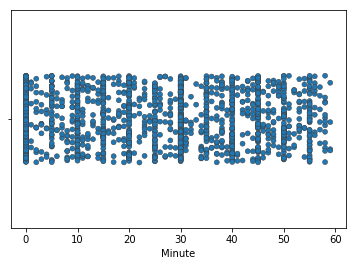

In [13]:
ax = sns.stripplot(x=hourly_reports['Minute'], jitter=0.20, linewidth=0.5)

**Histograms of crimes based on longitude**

Here, a pattern arises in all three histograms. Most of the crimes happen within certain longitudes, with crime 'emanating out' from the locations. DUI's are interesting; while they do bunch together around certain longitudes, they are much spread out than robberies or disorderly conduct. This might be because of the 'mobile' nature of the crime. 



In [18]:
dui_lat = dui['X']
conduct_lat = conduct['X']
robbery_lat = robberies['X']

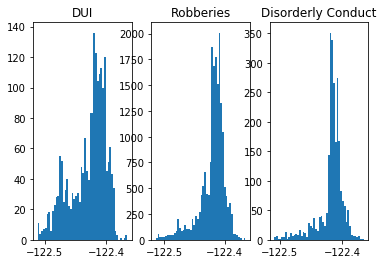

In [21]:
plt.subplot(1,3,1)
plt.title('DUI')
plt.hist(dui_lat,bins=50);
plt.subplot(1,3,2)
plt.title('Robberies')
plt.hist(robbery_lat,bins=50);
plt.subplot(1,3,3)
plt.title('Disorderly Conduct')
plt.hist(conduct_lat,bins=50);

**KDE plot of report-times**

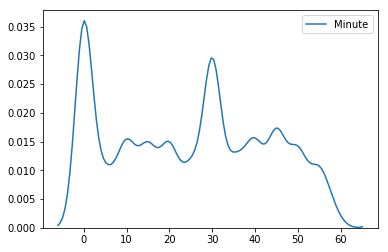

In [22]:
ax = sns.kdeplot(data=hourly_reports['Minute'],bw=2)

**KDE plot with sample size of 25**

KDE plots can most certainly misrepresent the data, and depending on what kernel size and bandwidth one uses, KDEs can introduce patterns that are not really there to begin with. Using a higher bandwidth can exacerbate this misrepresentation. 

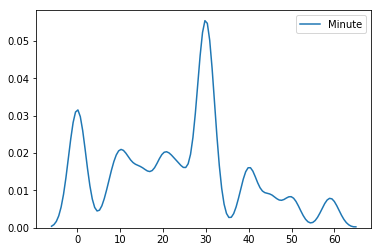

In [23]:
smaller_dataset = hourly_reports.sample(n=25)
ax = sns.kdeplot(data=smaller_dataset['Minute'],bw=2)